In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Analyse des données

Lecture des données. Un peu plus bas, j'ai detecté qu'un variable comporte **?**, il semblerait que ce sont les variables manquantes d'où l'ajout.

In [2]:
# Lecture des donnes
df = pd.read_csv("mushrooms.csv",  na_values='?')
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7840,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,v,l
807,e,x,y,y,t,a,f,c,b,p,...,y,w,w,p,w,o,p,k,y,g
5492,e,k,y,e,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4671,p,x,y,g,f,f,f,c,b,h,...,k,p,p,p,w,o,l,h,y,p
1319,e,x,s,w,f,n,f,w,b,p,...,s,w,w,p,w,o,e,k,s,g


Tous les variables sont de type **objet** (catégorielles) et on des modalités. La variable **stalk-root** a 2480 valeurs manquantes (parce que je considère que **?** est équivalent **NaN**.

In [3]:
# information sur le type et le nombre d'observation manquantes. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Je regarde les modalités. La variable **veil-type** n'a qu'une seule catégorie, c'est pourquoi je la supprimerai. 

In [4]:
# Comme toute les variables sont catégorielles,
# je regarde quelles sont les modalités et le nombre d'observations par modalite:
for ele in df.columns[1:]:
    print('='*65)
    print(ele, '   ', df[ele].unique())
    #print(df['ele].value_counts()) # le nombre d'observation par modalite

# On remarque qu'il y a une variable à classe unique, qui n'apporte pas d'information (a supprimer)
# Et la variable stalk-root qui contient '?' ce qui signifie probablement que c'est une valeure manquante
# => relectur des données en ajoutant  na_values='?'

cap-shape     ['x' 'b' 's' 'f' 'k' 'c']
cap-surface     ['s' 'y' 'f' 'g']
cap-color     ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises     ['t' 'f']
odor     ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment     ['f' 'a']
gill-spacing     ['c' 'w']
gill-size     ['n' 'b']
gill-color     ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape     ['e' 't']
stalk-root     ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring     ['s' 'f' 'k' 'y']
stalk-surface-below-ring     ['s' 'f' 'y' 'k']
stalk-color-above-ring     ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring     ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type     ['p']
veil-color     ['w' 'n' 'o' 'y']
ring-number     ['o' 't' 'n']
ring-type     ['p' 'e' 'l' 'f' 'n']
spore-print-color     ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population     ['s' 'n' 'a' 'v' 'y' 'c']
habitat     ['u' 'g' 'm' 'd' 'p' 'w' 'l']


On enlève les variables inutiles : **stalk-root** (valeurs manquantes) et **veil-type** (une seule catégorie). Dans une vraie étude j'essaierai de comprendre l'origine de ces valeurs manquantes et peut-être je corrigerai les valeurs (en prenant par exemple le mode).

In [5]:
df.drop(['veil-type', 'stalk-root'], axis=1, inplace=True)

Si on regarde la distribution de la variable **class**, les classes à predir sont équilibrés, ce qui facilite la classification et intérprétation.

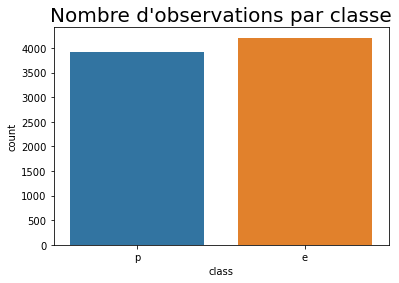

In [6]:
sns.countplot(x="class", data=df)
plt.title("Nombre d'observations par classe", fontsize=20)
plt.show()

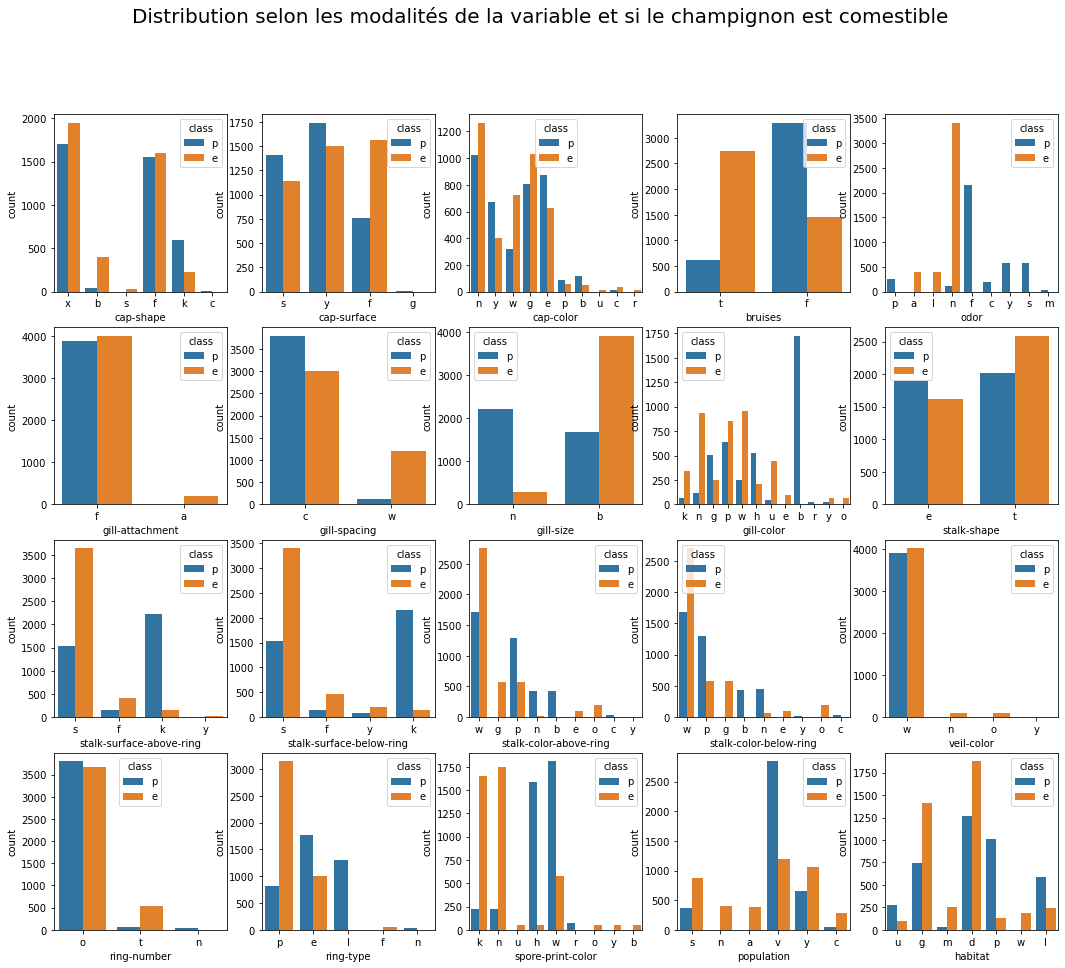

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(18, 15))
fig.suptitle("Distribution selon les modalités de la variable et si le champignon est comestible", fontsize=20)
for i in range(len(df.columns[1:])):
    sns.countplot(x=df.columns[1:][i], hue="class", data=df, ax=axes[i // 5][i % 5])

On remarque que pour certaines variables, par exemple **bruises**, **gill-color**, **spore-print-color**, il y a le lien entre les modalités de la variable et le class. Pour d'autres variables, **veil-color** p.ex., la classification n'a aucun intérêt.

On transforme toutes les variables en dummies parce qu'ici il n'y a pas une où les modalités ont un lien numérique. Par exemple transformer **cap-color** en variable numérique avec des valeures allant de 0 à 9 n'a pas de sens. Le fait d'avoir la couleur jaune n'a pas deux fois plus d'impact que la couleur noir.

On enlève aussi l'une des catégories parce qu'elle est inutile dans les estimations, surtout dans le cas des variables binaires.

On peut le faire avec sklearn (onehotencoder ou LabelEncoder), mais je ne vois pas l'intérêt ici.

In [8]:
# encoder les variables categoriel en k-1 variables dummies:
X = pd.get_dummies(df, drop_first=True)
# on enleve la variable class_p pour la mettre dans la target y
y = X.pop('class_p')
# et juste pour avoir le data frame sous la main
dataset = pd.concat([y, X], axis = 1)

Il y a beaucoup de variables (92), impossible d'afficher la matrice complète des correlations. De toute façon seule la variable dummy **p** (poisonous mooshrooms) nous intéresse. Je regarde donc les 20 correlations les plus marquante (10 pour positives, 10 pour négatives).

In [9]:
dataset.corr().class_p.nlargest(11)

class_p                       1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
odor_y                        0.286360
Name: class_p, dtype: float64

In [10]:
dataset.corr().class_p.nsmallest(10)

odor_n                       -0.785557
ring-type_p                  -0.540469
bruises_t                    -0.501530
stalk-surface-above-ring_s   -0.491314
stalk-surface-below-ring_s   -0.425444
spore-print-color_n          -0.416645
spore-print-color_k          -0.396832
gill-spacing_w               -0.348387
gill-color_n                 -0.288943
stalk-color-above-ring_g     -0.266489
Name: class_p, dtype: float64

Nous n'avons que des **0** et des **1**, inutile de normaliser ou standartiser les données.

Et finalement je sépare les données en train et test. La stratification est peu utile ici, beaucoup des données et les classes sont équilibrés, mais c'est toujours bien de le faire.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

# Fonction

La fonction automatise le processus pour n'importe quel model. Il y a dans sklearn **pipline**, mais ici le dataset est trop facile, inutile de faire des couches de codes...

Ma fonction prend en entrée le model avec les paramètres, les données et le dictionnaire où je sauvegarderai le résultat qui m'interesse. Par ailleurs la fonction affiche les scores (avec cross-validation) et la matrice de confusion.

J'ai vu que tous les modèles prédisent bien. Au final, le critère de décision si le modèle est bon ou non, c'est la capacité de pas se tromper en prédisant que le champignon est commestible, alors que ce n'est pas le cas.

In [12]:
dico_results = {}

In [13]:
def report_class(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, dico):
    """
    Inputs : 
    model : sklearn model with parameters
    X_TRAIN, Y_TRAIN, X_TEST, Y_TEST : data
    dico : dictionnary to save False Negatives
    
    Outputs : None
    
    Print : stats
    """
    # Nom du model
    print(str(model))
    
    # model avec cross-validation
    cv_scores = cross_validate(model, X_TRAIN, Y_TRAIN, cv = 10, scoring=['roc_auc', 'f1', 'accuracy'])
    print(f"Accuracy : {np.around(cv_scores['test_accuracy'].mean(),5)}")
    print(f"F1 : {np.around(cv_scores['test_f1'].mean(),5)}")
    print(f"ROC : {np.around(cv_scores['test_roc_auc'].mean(),5)}")
    
    # model pour sortir les predictions 
    # et pour visualiser la matrice des predictions
    a_estimer = model
    a_estimer.fit(X_TRAIN, Y_TRAIN)
    Y_TEST_PRED = a_estimer.predict(X_TEST)
    
    # plot
    plt.figure(figsize=(9,7))
    sns.heatmap(confusion_matrix(Y_TEST, Y_TEST_PRED), annot = True, cmap="viridis")
    plt.yticks([0.5, 1.5], ["Comestible", "empoisonnés"])
    plt.xticks([0.5, 1.5], ["Comestible", "empoisonnés"])
    plt.xlabel("Class predits", fontsize=20)
    plt.ylabel("Class observes", fontsize=20)
    plt.title("Matrice de confusion", fontsize=20)
    plt.show()
    
    # results save in dico (FN)
    dico[str(model)] = confusion_matrix(Y_TEST, Y_TEST_PRED)[1,0]  

# $K$ plus proches voisins

On regarde $k=20$ plus proches voisins. C'est plus que suffisant, pas besoin de grid search. Par contre il sera intéressant de voir les metrics après la cross-validation.

In [14]:
# importation des metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

KNeighborsClassifier(n_neighbors=20)
Accuracy : 0.99934
F1 : 0.99932
ROC : 0.99999


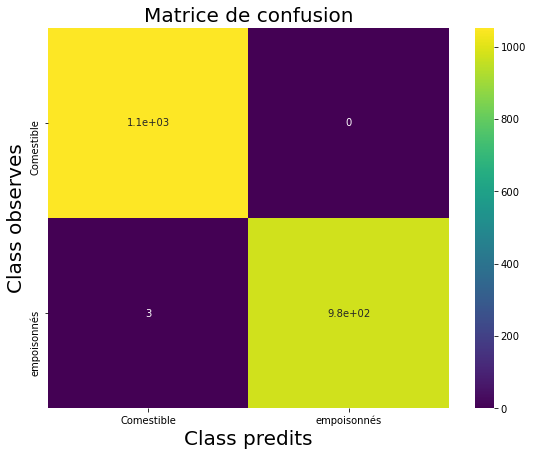

In [15]:
report_class(KNeighborsClassifier(n_neighbors=20), X_train, y_train, X_test, y_test, dico_results)

Etant donnée, que les champinions non comestibles puissent entrainer la mort, j'aimerais trouver un modèle qui de préférance a le taux de faux négatifs nul. Ici c'est 3, ce qui n'est pas bien. Ce résultat est sauvegardé dans le dictionnaire :

In [16]:
print(dico_results)

{'KNeighborsClassifier(n_neighbors=20)': 3}


# Arbre de décision

In [17]:
from sklearn import tree

arbre = tree.DecisionTreeClassifier()
arbre.fit(X_train, y_train)

DecisionTreeClassifier()

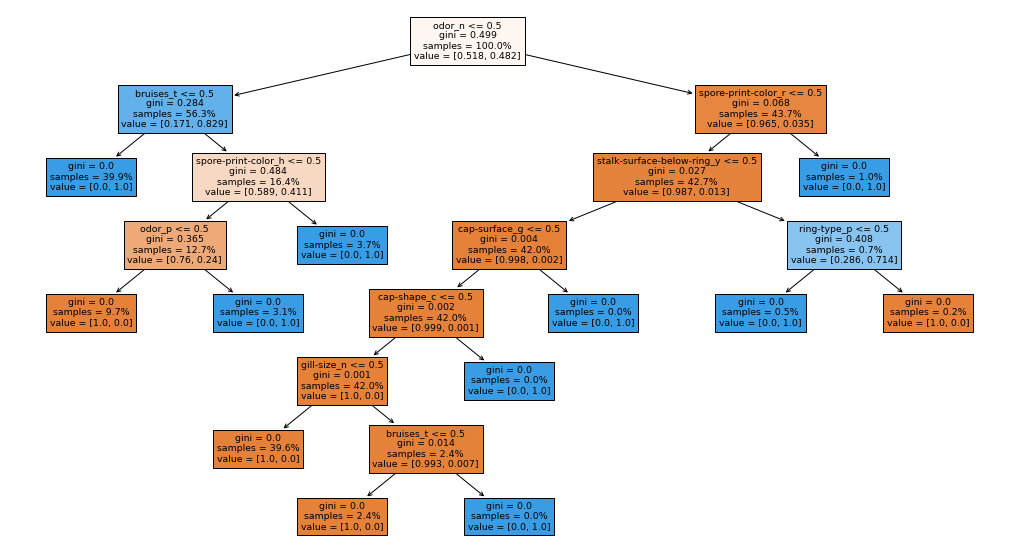

In [18]:
plt.figure(figsize=(18,10))
tree.plot_tree(arbre, proportion=True, filled=True, feature_names=X_train.columns) 
plt.show()

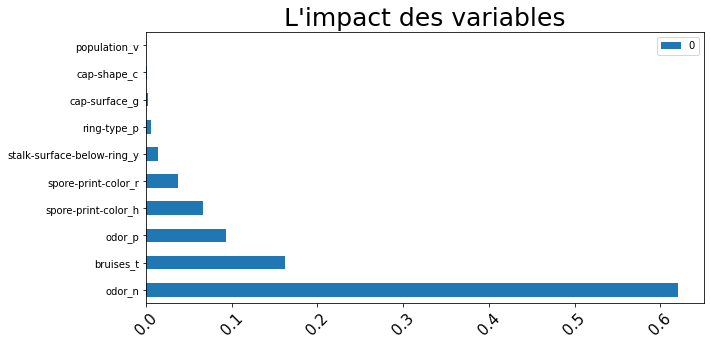

In [19]:
imp_variables = np.around(arbre.feature_importances_, 5)
df_features = pd.DataFrame(imp_variables, index=list(X_train.columns)).sort_values(by=[0],
                                                                                   ascending=False).iloc[0:10]
df_features.iloc[0:10].plot(kind='barh', figsize=(10,5))
plt.title("L'impact des variables", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

DecisionTreeClassifier(max_depth=3)
Accuracy : 0.96668
F1 : 0.96428
ROC : 0.99287


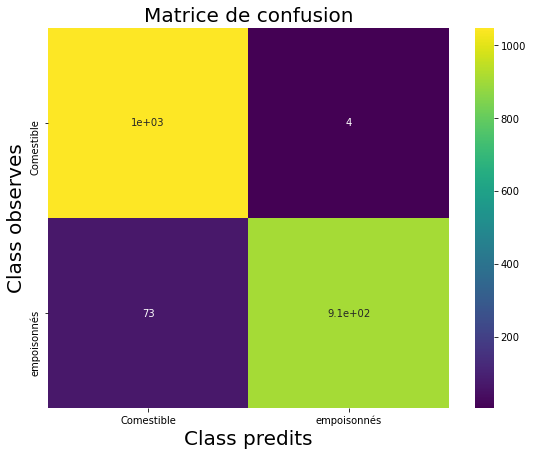

DecisionTreeClassifier(max_depth=7)
Accuracy : 0.99984
F1 : 0.99983
ROC : 0.99983


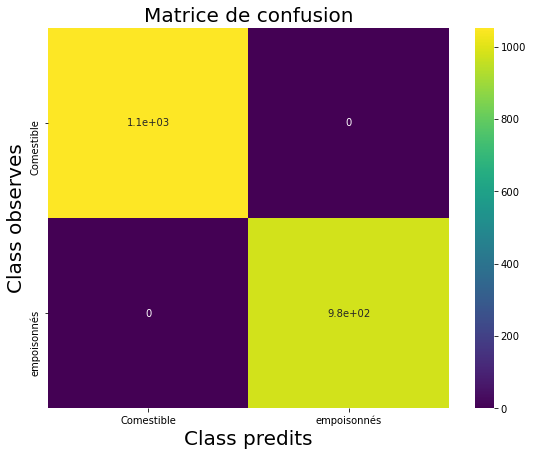

In [20]:
# On sauvegarde les résultats et on affiche les metriques
report_class(tree.DecisionTreeClassifier(max_depth=3), X_train, y_train, X_test, y_test, dico_results)
report_class(tree.DecisionTreeClassifier(max_depth=7), X_train, y_train, X_test, y_test, dico_results)

Les arbres des décisions ont une meilleure prédiction, aucun faux négatif et pour bien classer les données, il suffit d'utiliser $7$ niveaux. Parmi 91 variables, seuls $7$ variables ont un impact : odeur (n, p, f), bruise_t, spore_print_color, l'anneau du pied.

# Logit

In [22]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(C=0.01)
Accuracy : 0.98277
F1 : 0.98191
ROC : 0.9977


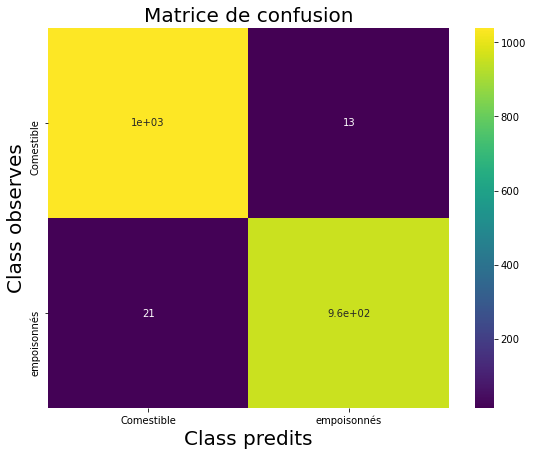

LogisticRegression(C=5)
Accuracy : 0.99984
F1 : 0.99983
ROC : 1.0


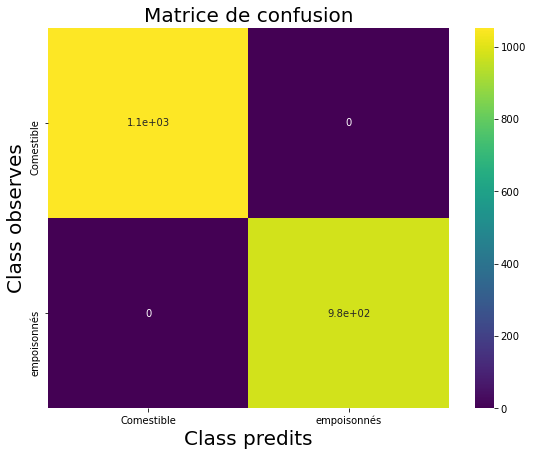

In [23]:
report_class(LogisticRegression(C=0.01), X_train, y_train, X_test, y_test, dico_results)
report_class(LogisticRegression(C=5), X_train, y_train, X_test, y_test, dico_results)

Le modèle Logit donne aussi de bon résultats (si la régularisation n'est pas très importante. Si $C<5$, il arrive d'avoir des faux négatives).

# SVM linéaire

Sans grande surprise, cela donne des bonnes résultats

In [24]:
from sklearn.svm import LinearSVC

LinearSVC()
Accuracy : 1.0
F1 : 1.0
ROC : 1.0


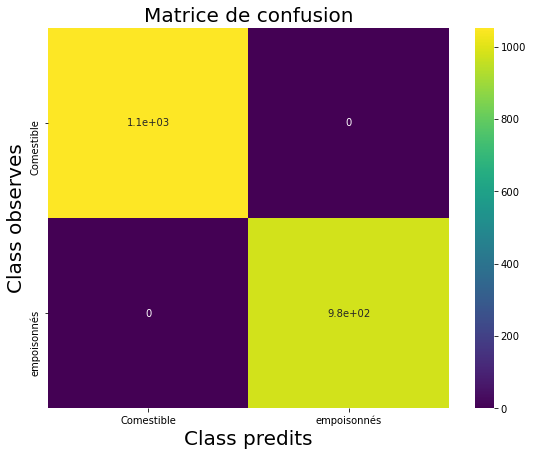

In [25]:
report_class(LinearSVC(), X_train, y_train, X_test, y_test, dico_results)

# Foret

Juste pour voir, mais comme les arbres de décision arrivent à bien classer les données, les fôrets aléatoires n'apportent rien. On le voit : même avec **n_estimators=2** pas d'erreurs (bon, cela dépend, parfois si).

In [31]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=2)
Accuracy : 0.99885
F1 : 0.9988
ROC : 1.0


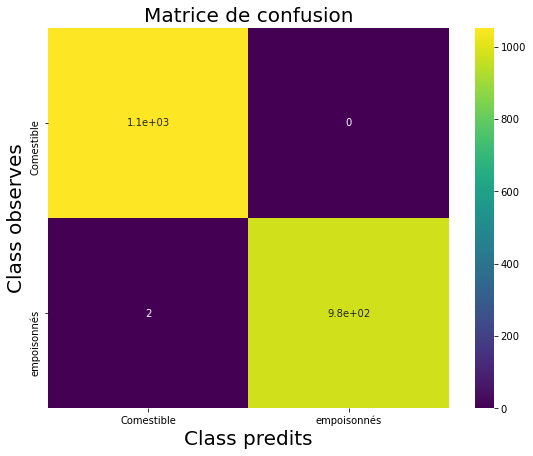

RandomForestClassifier(n_estimators=5)
Accuracy : 0.99984
F1 : 0.99983
ROC : 1.0


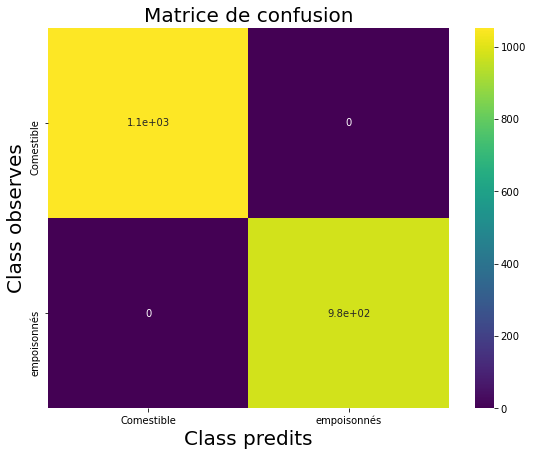

In [32]:
report_class(RandomForestClassifier(n_estimators=2), X_train, y_train, X_test, y_test, dico_results)
report_class(RandomForestClassifier(n_estimators=5), X_train, y_train, X_test, y_test, dico_results)

# Conclusion

Tous les modèles arrivent à très bien classer les données. Les modèles SVM linéaire, Arbre de décision, Forêt Aléatoire donnent le meilleur résultat possible en utilisant les paramètres par défaut. Il faut faire attention avec le model logit et la pénalité par défaut de **sklearn**. Sans surprise le modèle le moins précis est **$K$ plus proches voisins**.

In [36]:
print("Nombre des faux négatifs pour chaque modèle : \n")
for ele in dico_results:
    print(f"{ele} : {dico_results[ele]}.")

Nombre des faux négatifs pour chaque modèle : 

KNeighborsClassifier(n_neighbors=20) : 3.
DecisionTreeClassifier(max_depth=3) : 73.
DecisionTreeClassifier(max_depth=7) : 0.
LogisticRegression(C=0.01) : 21.
LogisticRegression(C=5) : 0.
LinearSVC() : 0.
RandomForestClassifier(n_estimators=2) : 2.
RandomForestClassifier(n_estimators=5) : 0.
